# OpenCV Darknet으로 YOLO 추론 실습

## 이미지 및 사전 훈련 모델 weight, config 다운로드

#### 이미지 다운로드

In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-04-22 14:39:47--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-04-22 14:39:47 (10.8 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



#### YOLO weight와 config 파일 다운로드

In [2]:
# COCO 데이터셋으로 사전 훈련된 YOLO weight 파일과 config 파일 다운로드하여 /content/pretrained 디렉터리에 저장
!mkdir ./pretrained

# YOLO weight와 config 파일 다운로드
!wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true 

# YOLO-tiny weight와 config 파일 다운로드
!wget -O /content/pretrained/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -O /content/pretrained/yolov3-tiny.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true

--2022-04-22 14:39:47--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/pretrained/yolov3.weights’

/content/pretrained 100%[===================>] 236.52M  41.3MB/s    in 6.1s    

2022-04-22 14:39:54 (38.5 MB/s) - ‘/content/pretrained/yolov3.weights’ saved [248007048/248007048]

--2022-04-22 14:39:54--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2022-04-22 14:39:54--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to

In [3]:
!ls /content/pretrained

yolov3.cfg  yolov3-tiny.cfg  yolov3-tiny.weights  yolov3.weights


## YOLO 활용 객체 탐지

In [4]:
import cv2

weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

#### COCO 클래스 ID와 클래스명 매핑

In [5]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

### YOLO 모델의 몇 가지 정보 추출

In [6]:
layer_names = cv_net_yolo.getLayerNames()
print(layer_names)

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [7]:
# 다음에 연결되지 않은 레이어(CNN 기준으로는 82번, 94번, 106번 레이어)
# BN, 활성화 함수 등을 모두 포함한 요소를 기준으로는 200, 227, 254번째 요소
cv_net_yolo.getUnconnectedOutLayers() 

array([[200],
       [227],
       [254]], dtype=int32)

In [8]:
# 레이어명
[layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]

['yolo_82', 'yolo_94', 'yolo_106']

In [9]:
layer_names = cv_net_yolo.getLayerNames() # 모든 레이어명
# 전체 레이어에서 13x13 grid, 26x26 grid, 52x52 grid의 출력 레이어만 필터링(객체 탐지에 사용할 레이어명)
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()] 

img = cv2.imread('./data/beatles01.jpg')

# 모델에 이미지 전달 (로딩한 모델은 YOLO v3 416 x 416 모델)
cv_net_yolo.setInput(cv2.dnn.blobFromImage(img, 
                                           scalefactor=1/255.0, # 정규화
                                           size=(416, 416),     # 원본 이미지 크기를 (416x416)으로 변경
                                           swapRB=True,         # BGR → RGB로 변환
                                           crop=False))
# 객체 탐지 수행
cv_outs = cv_net_yolo.forward(outlayer_names)

print('cv_outs의 내부 원소 개수 :', len(cv_outs))
# 13 x 13 x 3 = 507, 26 x 26 x 3 = 2028, 52 x 52 x 3 = 8112
print('cv_outs의 내부 원소 형상 :', cv_outs[0].shape, cv_outs[1].shape, cv_outs[2].shape)

cv_outs의 내부 원소 개수 : 3
cv_outs의 내부 원소 형상 : (507, 85) (2028, 85) (8112, 85)


### YOLO v3로 단일 이미지 객체 탐지를 수행하는 함수 생성

In [10]:
import numpy as np
import time

def get_detected_img(cv_net, img_array, score_threshold, nms_threshold, time_print=True):
        
    # 원본 이미지의 형상 정보
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    img_copy = img_array.copy() # 원본 이미지 복사본
    
    layer_names = cv_net.getLayerNames() # 전체 레이어명
    # 전체 Darknet 레이어에서 13x13, 26x26, 52x52 그리드의 레이어만 필터링(객체 탐지에 사용할 레이어)
    outlayer_names = [layer_names[i[0] - 1] for i in cv_net.getUnconnectedOutLayers()]
    
    # 모델에 이미지 전달 (로딩한 모델은 YOLO v3 416 x 416 모델)
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, 
                                          scalefactor=1/255.0, # 정규화
                                          size=(416, 416),     # 원본 이미지 크기를 (416x416)으로 변경
                                          swapRB=True,         # BGR → RGB로 변환
                                          crop=False))
    start = time.time()
    cv_outs = cv_net.forward(outlayer_names) # 객체 탐지 수행
    end = time.time()

    green_color = (0, 255, 0) # 경계 박스 테두리 색상
    red_color = (0, 0, 255)   # 텍스트 색상

    class_ids = []
    confidences = []
    boxes = []

    # 3개의 개별 출력 레이어별로 탐지한 객체에 대해서 객체 탐지 정보 추출과 시각화 ---① 
    for cv_out_idx, cv_out in enumerate(cv_outs):
        for detection_idx, detection in enumerate(cv_out): # 탐지된 객체 순회
            scores = detection[5:]        # 80개 클래스별 확률 점수
            class_id = np.argmax(scores)  # 클래스 ID
            confidence = scores[class_id] # class_id에 해당하는 클래스의 확률 점수
            if confidence > score_threshold: # 신뢰도가 score_threshold보다 큰 값만 추출 
                # 탐지된 좌표값은 스케일링된 중심 좌표와 너비/높이
                # 이를 원본 이미지에 맞게 스케일 적용 ---②
                x_center = int(detection[0] * cols)
                y_center = int(detection[1] * rows)
                width = int(detection[2] * cols)
                height = int(detection[3] * rows)
                # 중심 좌표와 너비/높이를 활용해 좌상단 좌표 구하기 ---③
                x_min = int(x_center - width / 2)
                y_min = int(y_center - height / 2)
                # 3개의 개별 출력 레이어별로 탐지된 객체에 대한 클래스 ID, 신뢰도, 좌표값 저장
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x_min, y_min, width, height])
    
    # 비최댓값 억제(NMS) 적용해 필터링된 인덱스 추출 ---④
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold, nms_threshold)

    if len(idxs) > 0:
        for i in idxs.flatten():
            box = boxes[i]
            x_min, y_min, width, height = box[0], box[1], box[2], box[3]
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경
            class_name = labels_to_names_seq[class_ids[i]] # 클래스명
            confidence_score = confidences[i]              # 신뢰도 점수
            caption = f'{class_name}: {confidence_score:.4f}'

            # 경계 박스와 캡션(클래스명, 신뢰도 점수) 표시(위치 인자는 반드시 정수형)
            # cv2.rectangle()은 인자로 들어온 img_copy에 사각형을 그림
            cv2.rectangle(img_copy, (int(x_min), int(y_min)), (int(x_min+width), int(y_min+height)), 
                          color=green_color, thickness=2)
            cv2.putText(img_copy , caption, (int(x_min), int(y_min - 5)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)

    if time_print: # 소요 시간 출력
        print('* 객체 탐지 수행 시간:', round(end - start, 2), '초')

    return img_copy 

### 객체 탐지 수행

In [11]:
weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'

# Darknet YOLO v3 사전 훈련 모델 불러오기
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

* 객체 탐지 수행 시간: 2.34 초


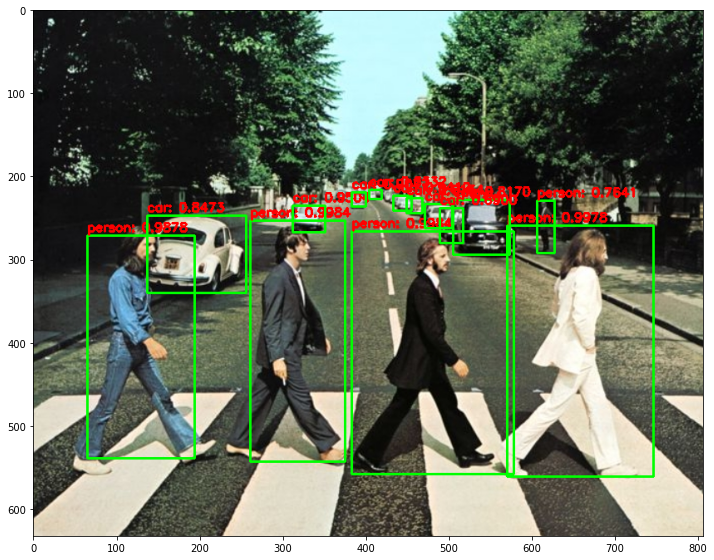

In [12]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/data/beatles01.jpg')

score_threshold = 0.5
nms_threshold = 0.4

# 객체 탐지 수행
draw_img = get_detected_img(cv_net_yolo, img, 
                            score_threshold=score_threshold, 
                            nms_threshold=nms_threshold, 
                            time_print=True)

# 객체 탐지 결과 시각화
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb);

### YOLO-tiny로 객체 탐지

* 객체 탐지 수행 시간: 0.56 초


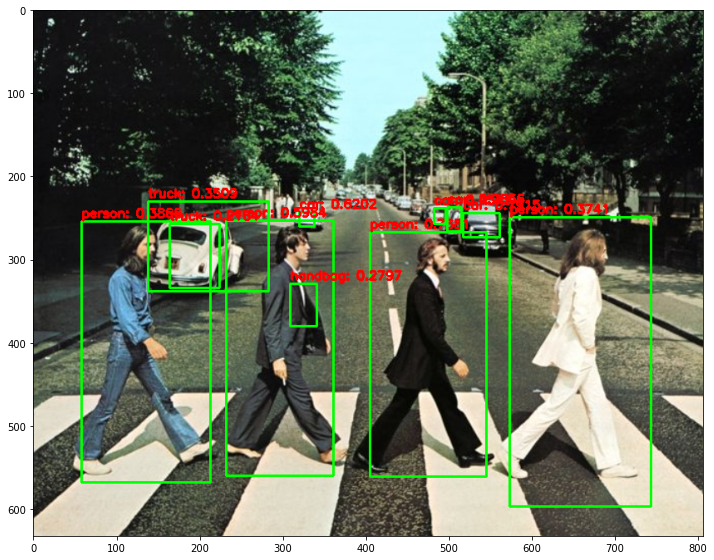

In [15]:
weights_path = '/content/pretrained/yolov3-tiny.weights'
config_path =  '/content/pretrained/yolov3-tiny.cfg'

cv_net_yolo_tiny = cv2.dnn.readNetFromDarknet(config_path, weights_path)

score_threshold = 0.2
nms_threshold = 0.4

# 객체 탐지 수행
draw_img = get_detected_img(cv_net_yolo_tiny, img, 
                            score_threshold=score_threshold, 
                            nms_threshold=nms_threshold, 
                            time_print=True)

# 객체 탐지 결과 시각화
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb);